#### Variables
CUST_ID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('clusterE.csv')
df = pd.DataFrame(data)
df_copy = df.copy()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [43]:
df = df.drop(['CUST_ID'], axis=1)

In [44]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [45]:
## NO ENCONTRAMOS FILAS DUPLICADAS
duplicates = df.duplicated()
duplicates.sum()

0

In [46]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [47]:
## TRABAJAMOS CON LOS VALORES FALTANTES
df_grap = df.copy()
df.fillna(method='ffill', inplace=True)
df_grap.fillna(method='ffill', inplace=True)

#### ANALISIS GRAFICO

1. Gran cantidad de outliers razonables con el tema de estudio. Estos deben ser tomados en cuenta y no se modificaran a lo largo del proyecto

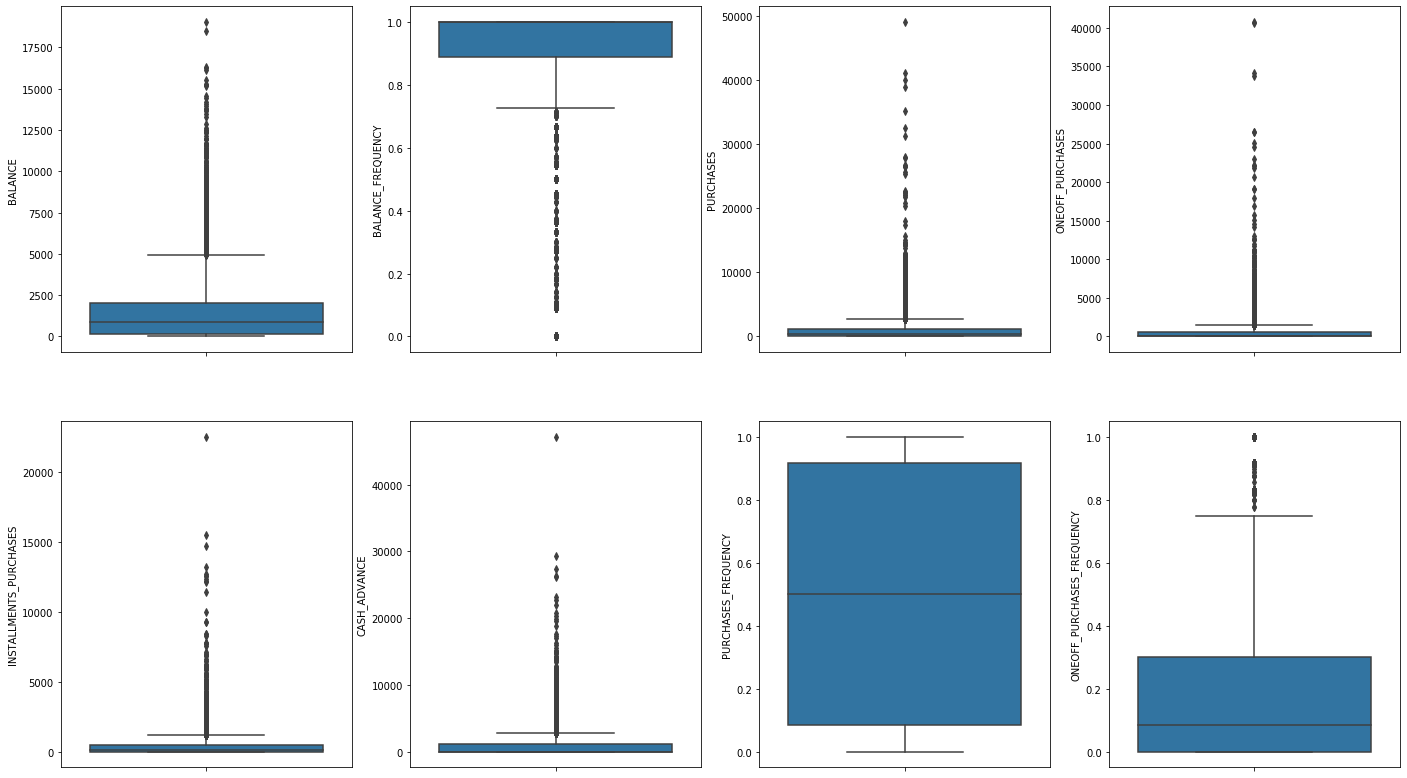

In [32]:
#GRAN CANTIDAD DE OUTLIERS EN LA DATA.
columns = df.columns
fig, axes = plt.subplots(ncols=4, nrows=2,figsize=(24,14))
for col, axes in zip(columns, axes.flatten()):
    sns.boxplot(df[col], ax=axes, orient='vertical')

C:\Users\Usurio\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


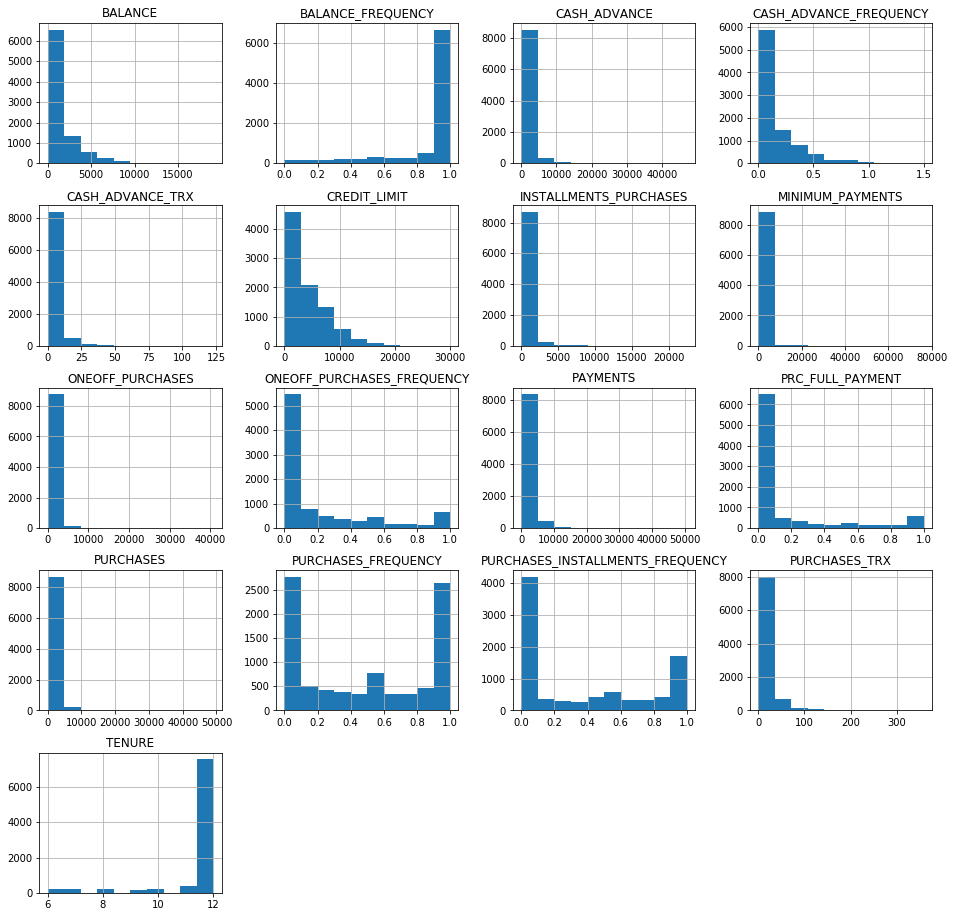

In [33]:
## OBSERVACIONES DE LAS DIFERENTES VARIABLES
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [48]:
labels = ['Baja','Media','Alta']
bins = [-1,0.40,0.60,1]

df_grap['BALANCE_FREQUENCY'] = pd.cut(df_grap['BALANCE_FREQUENCY'],bins=bins, labels=labels)
df_grap['PURCHASES_FREQUENCY'] = pd.cut(df_grap['PURCHASES_FREQUENCY'],bins=bins, labels=labels)
df_grap['ONEOFF_PURCHASES_FREQUENCY'] = pd.cut(df_grap['ONEOFF_PURCHASES_FREQUENCY'],bins=bins, labels=labels)
df_grap['PURCHASES_INSTALLMENTS_FREQUENCY'] = pd.cut(df_grap['PURCHASES_INSTALLMENTS_FREQUENCY'],bins=bins, labels=labels)
df_grap['CASH_ADVANCE_FREQUENCY'] = pd.cut(df_grap['CASH_ADVANCE_FREQUENCY'],bins=bins, labels=labels)

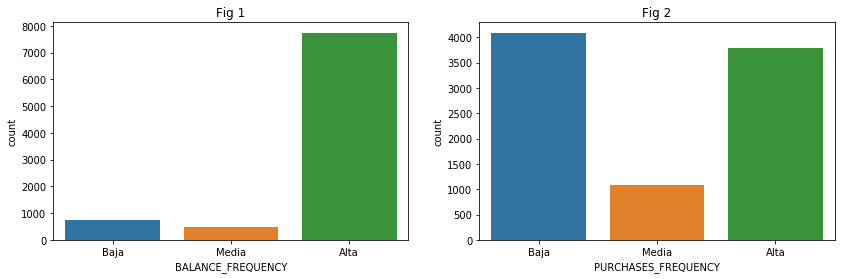

In [49]:
fig , (ax1,ax0) = plt.subplots(ncols=2, nrows=1,figsize=(14,4))
g = sns.countplot(df_grap['BALANCE_FREQUENCY'], ax=ax1)
g.set(title='Fig 1')
g = sns.countplot(df_grap['PURCHASES_FREQUENCY'], ax=ax0)
g.set(title='Fig 2')
plt.show()

Podemos observar que en la figura 1 las personas tienden a mantener una frencuencia alta de actualizar su balance. Para la figura 2 vemos que la frecuencia con la que se realizan compras de una manera espontanea es relativamente baja con respecto a frecuencia baja y alta de compra.

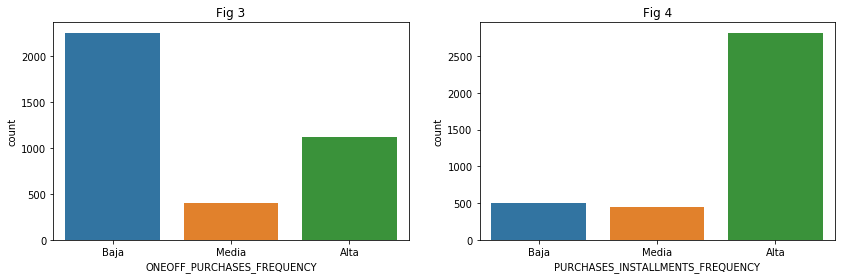

In [51]:
purchaes = df_grap[df_grap['PURCHASES_FREQUENCY']=='Alta']
fig , (ax1,ax0) = plt.subplots(ncols=2, nrows=1,figsize=(14,4))
g = sns.countplot(purchaes['ONEOFF_PURCHASES_FREQUENCY'], ax=ax1)
g.set(title='Fig 3')
g = sns.countplot(purchaes['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=ax0)
g.set(title='Fig 4')
plt.show()

Las personas tienden a no realizar compras con un unico pago frecuentemente como se observa en la figura 3 aunque se encuentra una minoria que si lo hace, mientras que en la figura 4 muestra una frecuencia alta para los pagos por cuotas o plazos

In [52]:
#VALOR MEDIO DE COMPRAS REALIZADAS DESDE LA CUENTA PARA CADA FRECUENCIA DE COMPRA 
compras_usuario = df_grap.groupby('PURCHASES_FREQUENCY')['PURCHASES'].mean()
print(compras_usuario)

PURCHASES_FREQUENCY
Baja      220.366904
Media     840.668675
Alta     1896.864506
Name: PURCHASES, dtype: float64


In [53]:
#VALOR MEDIO DEL LIMITE DE CREDITO PARA LA FRECUENCIA DE COMPRA
compras_limitcred = df_grap.groupby('PURCHASES_FREQUENCY')['CREDIT_LIMIT'].mean()
print(compras_limitcred)

PURCHASES_FREQUENCY
Baja     4095.143876
Media    4373.114075
Alta     4961.211346
Name: CREDIT_LIMIT, dtype: float64


In [54]:
#VALOR MEDIO DE SALDO EN LA CUENTA PARA COMPRAS POR FRECUENCIA DE ACTUALIZACION DE SALDO
saldo_freq = df_grap.groupby('BALANCE_FREQUENCY')['BALANCE'].mean()
print(saldo_freq)

BALANCE_FREQUENCY
Baja       77.637846
Media     241.219973
Alta     1786.369276
Name: BALANCE, dtype: float64


#### MANEJO DE CARACTERISTICAS

In [40]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522590
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.404947
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [41]:
columnsSkw = df[['MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS']].columns

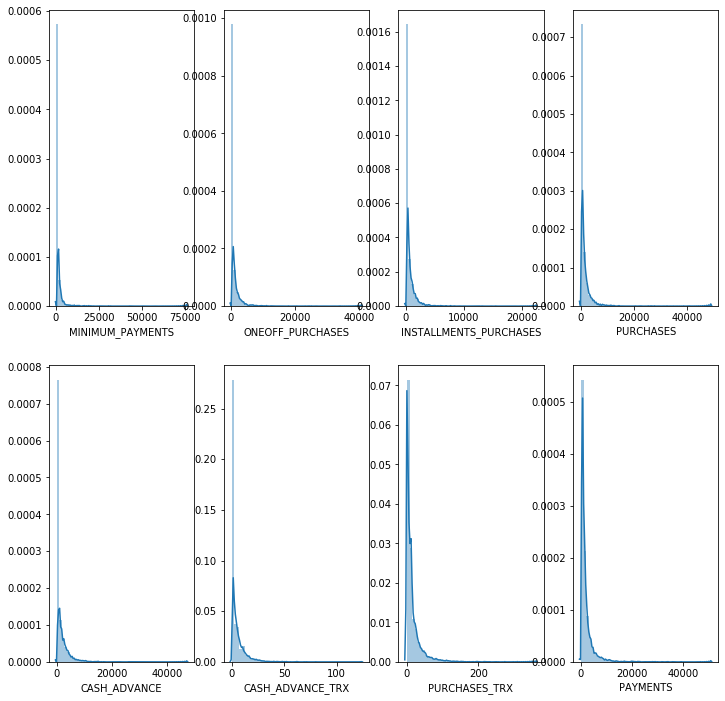

In [190]:
fig, axes = plt.subplots(ncols=4, nrows=2,figsize=(12,12))
for col, axes in zip(columnsSkw, axes.flatten()):
    sns.distplot(df[col], ax=axes)

In [191]:
from sklearn.preprocessing import PowerTransformer
Transformer = PowerTransformer(method='yeo-johnson', standardize=True)
df[columnsSkw] = Transformer.fit_transform(df[columnsSkw])

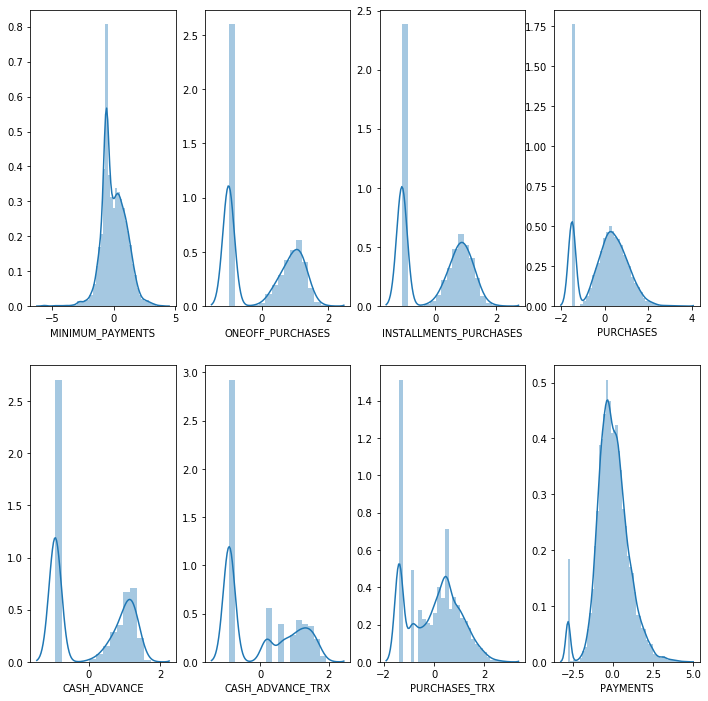

In [192]:
#Despues de la centralizacion de los datos pre-PCA
fig, axes = plt.subplots(ncols=4, nrows=2,figsize=(12,12))
for col, axes in zip(columnsSkw, axes.flatten()):
    sns.distplot(df[col], ax=axes)

In [193]:
#ESCALAMOS LOS DATOS FALTANTES
columnsSkw = df[['TENURE','PRC_FULL_PAYMENT','CREDIT_LIMIT','CASH_ADVANCE_FREQUENCY','BALANCE','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']].columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.368050,-1.000488,0.383704,-0.944538,-0.806490,-0.678661,-0.707313,-0.675349,-0.905801,-0.573664,-0.960417,-0.983876,-0.814209,-0.525551,0.36068
1,0.786961,0.134325,-1.505149,-1.000488,-1.085422,1.399909,-1.221758,-0.678661,-0.916995,0.573963,1.044342,-1.387624,0.688654,1.285321,0.898182,0.234227,0.36068
2,0.447135,0.518084,0.521657,1.065381,-1.085422,-0.944538,1.269843,2.673451,-0.916995,-0.675349,-0.905801,0.494757,0.826076,-0.291722,0.463580,-0.525551,0.36068
3,0.049099,-1.016953,0.875823,1.229556,-1.085422,0.680451,-1.014125,-0.399319,-0.916995,-0.258913,0.194580,-0.872718,0.826076,-2.782085,0.463580,-0.525551,0.36068
4,-0.358775,0.518084,-0.904786,-0.019902,-1.085422,-0.944538,-1.014125,-0.399319,-0.916995,-0.675349,-0.905801,-0.872718,-0.905448,-0.231669,-0.326111,-0.525551,0.36068


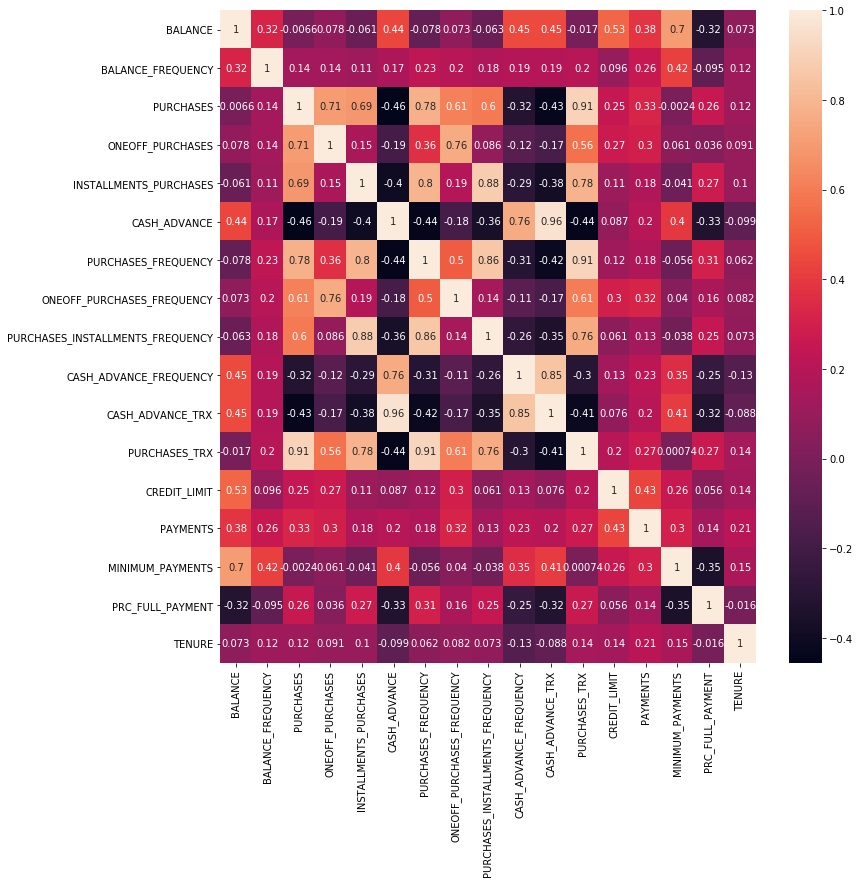

In [194]:
#OBSERVAMOS CORRELACIONES
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)
plt.show()

In [195]:
#OBSERVAMOS MULTICOLANIEDAD DENTRO DEL CONJUNO DE DATOS
corr_matrix = df.corr().abs()
superior = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in superior.columns if any(superior[column] > 0.75)]
to_drop

['PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX']

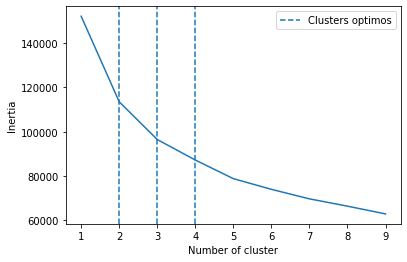

In [177]:
## CALCULO DE CLUSTERS
from sklearn.cluster import KMeans

inertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    inertia[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.axvline(x=3, label='Clusters optimos', linestyle='--')
plt.axvline(x=2,linestyle='--')
plt.axvline(x=4,linestyle='--')
plt.legend()
plt.show()

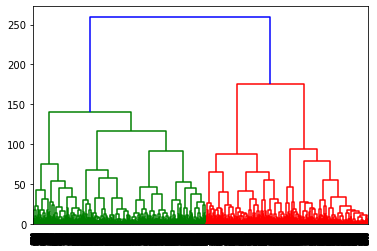

In [159]:
## Aqui se puede corroborar que el aprox de clusters optimos esta entre 3 o 4
import scipy.cluster.hierarchy as sch
dedogram = sch.dendrogram(sch.linkage(df, method='ward'))

Clusters = 2 Media silhouette_score: 0.2508725558986506
Clusters = 3 Media silhouette_score: 0.22013861638683418
Clusters = 4 Media silhouette_score: 0.21489375381878656
Clusters = 5 Media silhouette_score: 0.2151739565410468
Clusters = 6 Media silhouette_score: 0.2125688606376072
Clusters = 8 Media silhouette_score: 0.2188211334104187


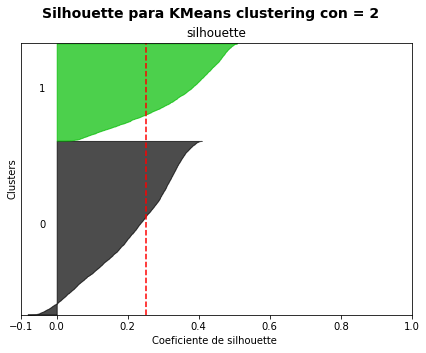

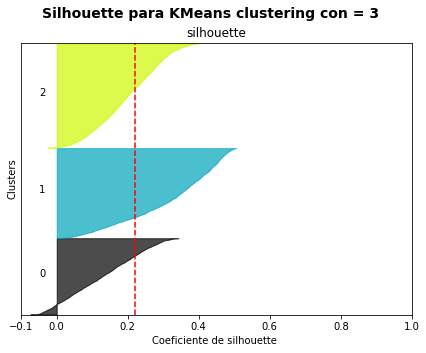

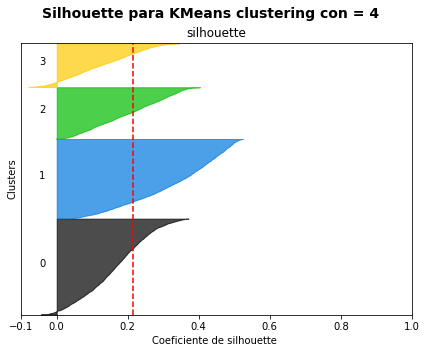

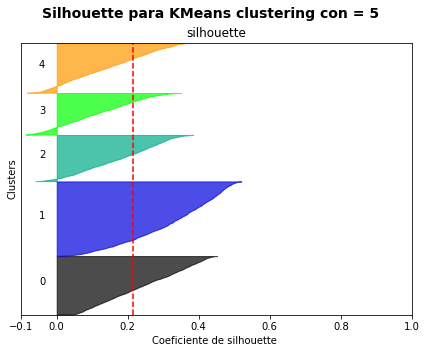

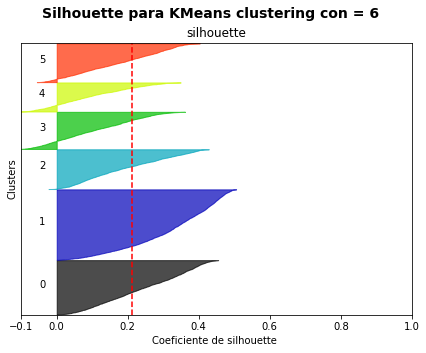

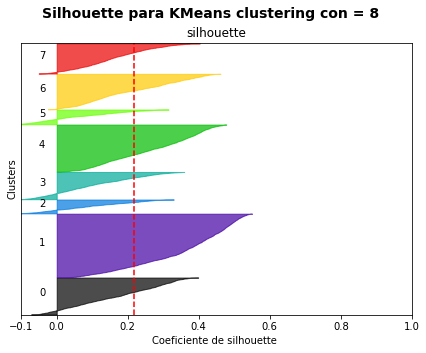

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, max_iter=500, random_state=5)  
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("Clusters =", n_clusters,
          "Media silhouette_score:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette")
    ax1.set_xlabel("Coeficiente de silhouette ")
    ax1.set_ylabel("Clusters")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
    plt.suptitle(("Silhouette para KMeans clustering con = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [178]:
modelo = KMeans(n_clusters=3, max_iter=1000)
modelo.fit(df)

KMeans(max_iter=1000, n_clusters=3)

In [196]:
df_copy['Labels'] = modelo.labels_
df_copy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


##### Analisis de la segmentacion

Variabilidad de los diferentes atributos con respecto a los cluster realizados

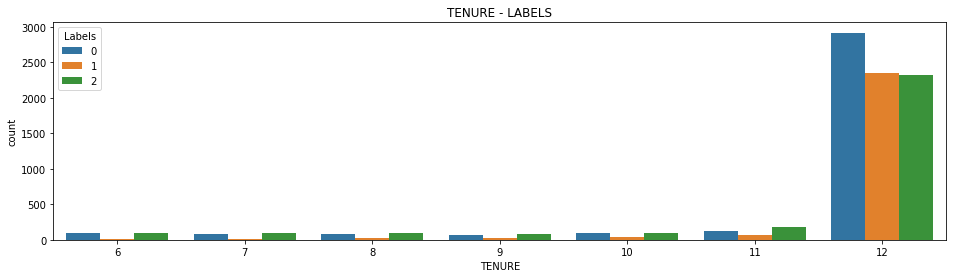

In [237]:
plt.figure(figsize=(16,4))
sns.countplot(x='TENURE', data=df_copy, hue='Labels')
plt.title('TENURE - LABELS')
plt.show()

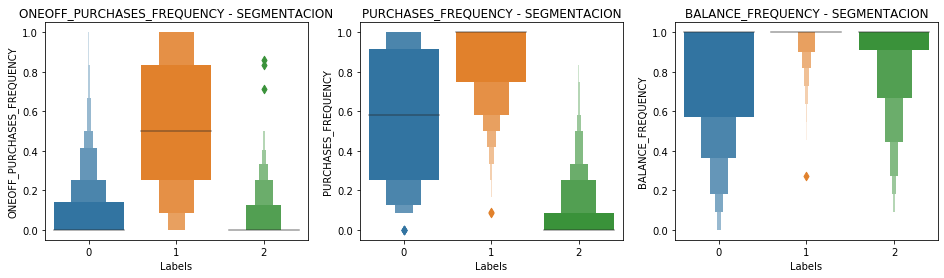

In [227]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
g = sns.boxenplot(data=df_copy, y='ONEOFF_PURCHASES_FREQUENCY', x='Labels', ax=ax0)
g.set(title='ONEOFF_PURCHASES_FREQUENCY - SEGMENTACION')
g = sns.boxenplot(data=df_copy, y='PURCHASES_FREQUENCY', x='Labels', ax=ax1)
g.set(title='PURCHASES_FREQUENCY - SEGMENTACION')
g = sns.boxenplot(data=df_copy, y='BALANCE_FREQUENCY', x='Labels', ax=ax2)
g.set(title='BALANCE_FREQUENCY - SEGMENTACION')
plt.show()

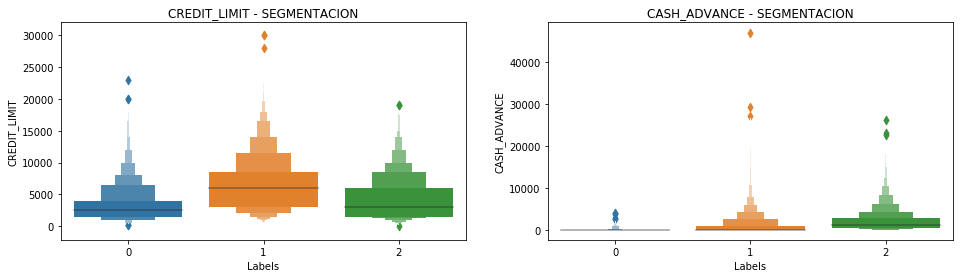

In [226]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
g = sns.boxenplot(data=df_copy, y='CREDIT_LIMIT', x='Labels', ax=ax0)
g.set(title='CREDIT_LIMIT - SEGMENTACION')
g = sns.boxenplot(data=df_copy, y='CASH_ADVANCE', x='Labels', ax=ax1)
g.set(title='CASH_ADVANCE - SEGMENTACION')
plt.show()

#### Segmetacion
Dentro del agrupamiento para los labels seleccionados encontramos las caracteristicas para cada uno de estos:

Label 1: Conjunto de personas con tenencia de servicio para la tarjeta de credito baja con respecto a los demas. Este grupo se caracteriza por comprar con una frecuencia alta y pagar de manera directa a un pago actuzalizando su saldo de manera frecuente. Tiene una media de limite de credito alta.

Label 0: Tienen una tenencia de la tarjeta de credito alta. No presentan una frecuencia muy alta de comprar a un solo pago al igual que su frecuencia de compra es media con respecto a los demas. Su actualizacion de estado es regular con un limite de credito bajo. 

Label 2: Se mantiene su tenecia de tarjeta de manera regular-alta.Frecuencia de compra a un solo pago mas baja que los demas al igual que su frecuencia de compra, mantiene una actualizacion de estado regular y su limite de credito es medio con respecto a las demas grupos.